<a href="https://colab.research.google.com/github/sumonabhowmick/face-mask-detection/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

importing face mask dataset

In [3]:
# api to fetch dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 74% 121M/163M [00:00<00:00, 649MB/s] 
100% 163M/163M [00:00<00:00, 535MB/s]


In [4]:
#extracting compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


Importing Depedencies

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1389.jpg', 'with_mask_2262.jpg', 'with_mask_105.jpg', 'with_mask_2792.jpg', 'with_mask_1400.jpg']
['with_mask_3445.jpg', 'with_mask_232.jpg', 'with_mask_265.jpg', 'with_mask_794.jpg', 'with_mask_3252.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1378.jpg', 'without_mask_1890.jpg', 'without_mask_2255.jpg', 'without_mask_1153.jpg', 'without_mask_412.jpg']
['without_mask_1794.jpg', 'without_mask_2961.jpg', 'without_mask_1781.jpg', 'without_mask_2912.jpg', 'without_mask_2587.jpg']


In [8]:
print('number of with mask images:',len(with_mask_files))
print('number of without mask images:',len(without_mask_files))

number of with mask images: 3725
number of without mask images: 3828


creating labels for two class of images

In [9]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:
labels = with_mask_labels + without_mask_labels
print(labels[0:5])
print(labels[-5:])
print(len(labels))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
7553


displaying the image

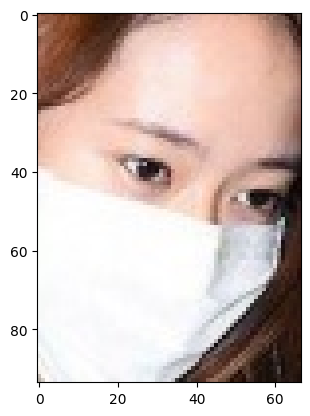

In [11]:
img = mpimg.imread('/content/data/with_mask/with_mask_1784.jpg')
imgplot = plt.imshow(img)
plt.show()

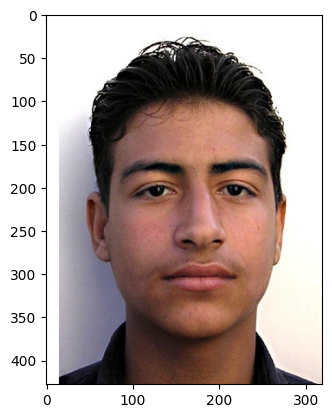

In [12]:
img = mpimg.imread('/content/data/without_mask/without_mask_1003.jpg')
imgplot = plt.imshow(img)
plt.show()

Image processing

1. resize the image
2. convert the images to numpy arrays

In [13]:
#convert image to numpy array

with_mask_path = '/content/data/with_mask/'
data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
len(data), type(data)

(7553, list)

array([[[ 28,  17,  21],
        [ 26,  15,  19],
        [ 26,  16,  19],
        ...,
        [132, 129, 136],
        [129, 126, 133],
        [132, 129, 136]],

       [[ 25,  14,  18],
        [ 20,   9,  13],
        [ 18,   7,   9],
        ...,
        [143, 140, 147],
        [136, 133, 141],
        [133, 130, 138]],

       [[ 22,  11,  15],
        [ 18,   7,  11],
        [ 15,   6,   7],
        ...,
        [154, 151, 160],
        [145, 142, 151],
        [137, 134, 143]],

       ...,

       [[ 39,  30,  31],
        [ 49,  40,  41],
        [ 48,  39,  40],
        ...,
        [  9,   7,   8],
        [ 10,   7,   7],
        [ 11,   7,   6]],

       [[ 36,  26,  27],
        [ 55,  45,  46],
        [ 61,  51,  52],
        ...,
        [ 10,   8,   7],
        [ 11,   8,   7],
        [ 12,   8,   7]],

       [[ 36,  26,  27],
        [ 59,  49,  50],
        [ 67,  57,  58],
        ...,
        [ 10,   9,   7],
        [ 11,   9,   7],
        [ 12,   8,   7]]], dtype=uint8)
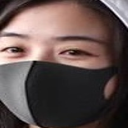

In [15]:
data[0]

In [16]:
type(data[0]), data[0].shape

(numpy.ndarray, (128, 128, 3))

In [17]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [18]:
type(X), type(Y)

(numpy.ndarray, numpy.ndarray)

In [19]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


train test split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [21]:
#scaling the features

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [23]:
print(X_train[0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [238 236 245]
  [235 234 241]
  [239 238 246]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [233 231 240]
  [236 235 243]
  [237 236 243]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [239 238 244]
  [241 240 247]
  [241 239 247]]]


In [24]:
print(X_train_scaled[0])

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.93333333 0.9254902  0.96078431]
  [0.92156863 0.91764706 0.94509804]
  [0.9372549  0.93333333 0.96470588]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


BUILDING A CONVOLUTIONAL NEURAL NETWORK

In [25]:
import tensorflow as tf
from tensorflow import keras

In [29]:
num_of_classes = 2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
#compile neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

#training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - acc: 0.6917 - loss: 0.6651 - val_acc: 0.8942 - val_loss: 0.2793
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8940 - loss: 0.2998 - val_acc: 0.9124 - val_loss: 0.2146
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8974 - loss: 0.2475 - val_acc: 0.9273 - val_loss: 0.2305
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9284 - loss: 0.2018 - val_acc: 0.9207 - val_loss: 0.1962
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9394 - loss: 0.1635 - val_acc: 0.9273 - val_loss: 0.1928


In [32]:
#model evaluation
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9181 - loss: 0.1984
Test Accuracy = 0.9152879118919373


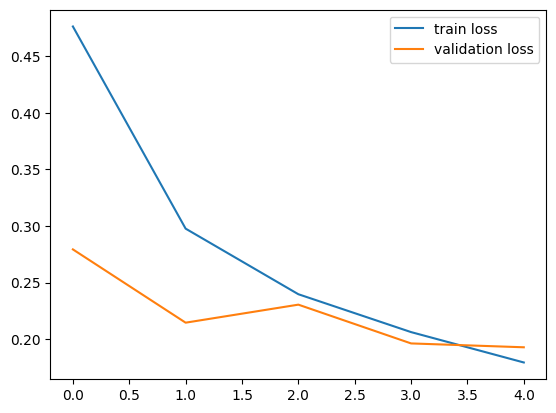

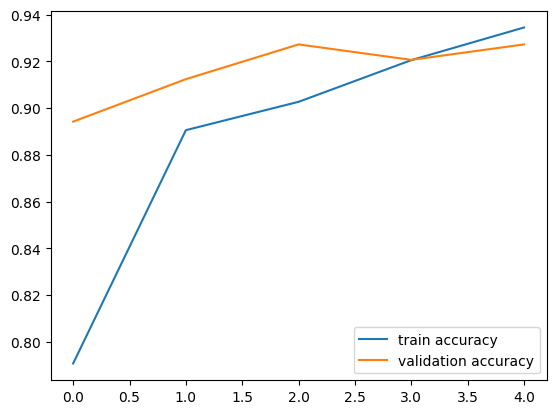

In [33]:
# plot the loss value
h = history

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

predictive system

Path of the image to be predicted: /content/istockphoto-1311420208-1024x1024.jpg


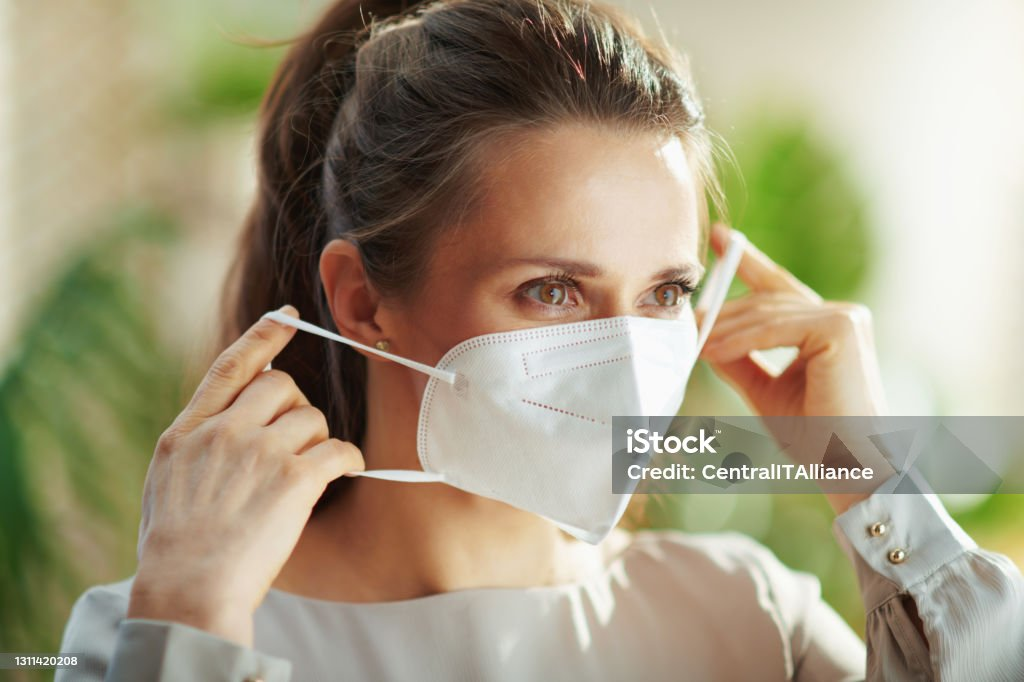

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step
[[0.3986311 0.6764374]]
1
The person in the image is wearing a mask


In [34]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')